In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(PATH)

/home/jordan/.keras/datasets/cats_and_dogs_filtered


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [11]:
print(train_image_generator)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)

In [15]:
sample_training_images[0]

array([[[0.5803922 , 0.4784314 , 0.427451  ],
        [0.5411765 , 0.4666667 , 0.40784317],
        [0.6313726 , 0.5882353 , 0.5176471 ],
        ...,
        [0.43921572, 0.39607847, 0.2784314 ],
        [0.80392164, 0.77647066, 0.6666667 ],
        [0.654902  , 0.6313726 , 0.54509807]],

       [[0.5647059 , 0.5176471 , 0.47058827],
        [0.7568628 , 0.72156864, 0.6627451 ],
        [0.77647066, 0.7411765 , 0.6745098 ],
        ...,
        [0.34509805, 0.29803923, 0.19607845],
        [0.627451  , 0.59607846, 0.5137255 ],
        [0.6745098 , 0.6431373 , 0.5921569 ]],

       [[0.81568635, 0.80392164, 0.7372549 ],
        [0.7058824 , 0.6862745 , 0.6117647 ],
        [0.5372549 , 0.5058824 , 0.43137258],
        ...,
        [0.3803922 , 0.33333334, 0.24705884],
        [0.5568628 , 0.52156866, 0.46274513],
        [0.6627451 , 0.627451  , 0.5921569 ]],

       ...,

       [[0.25490198, 0.23529413, 0.21176472],
        [0.47058827, 0.45882356, 0.43921572],
        [0.59607846, 0

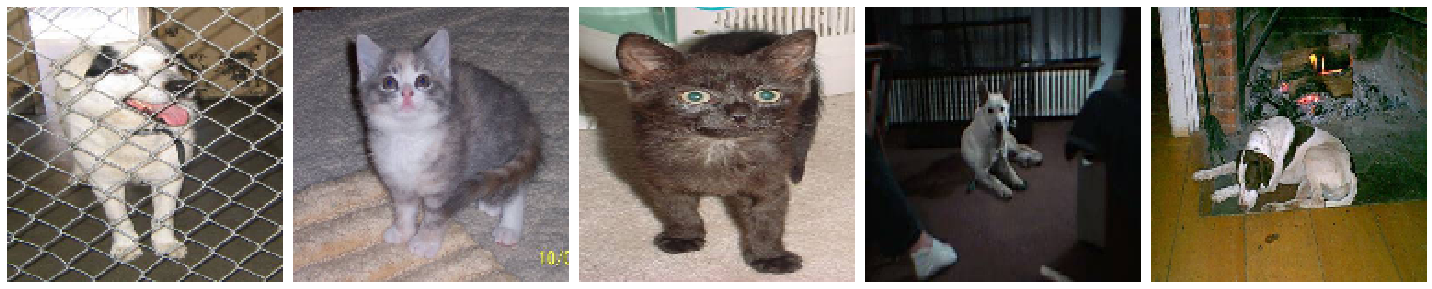

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(sample_training_images[:5])

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(350, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [20]:
# history = model.fit_generator(
#     train_data_gen,
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size
# )

In [21]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [22]:
# testDir = os.path.join(PATH, 'test')
# testImage = validation_image_generator.flow_from_directory(batch_size=1,
#                                                               directory=testDir,
#                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                               class_mode='binary')
# test_image = next(testImage)
# plt.imshow(test_image[0][0], interpolation='nearest')
# plt.show()

In [23]:

# model.predict_proba(test_image)


# END OF MODEL 1 

In [24]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [25]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [27]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [28]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


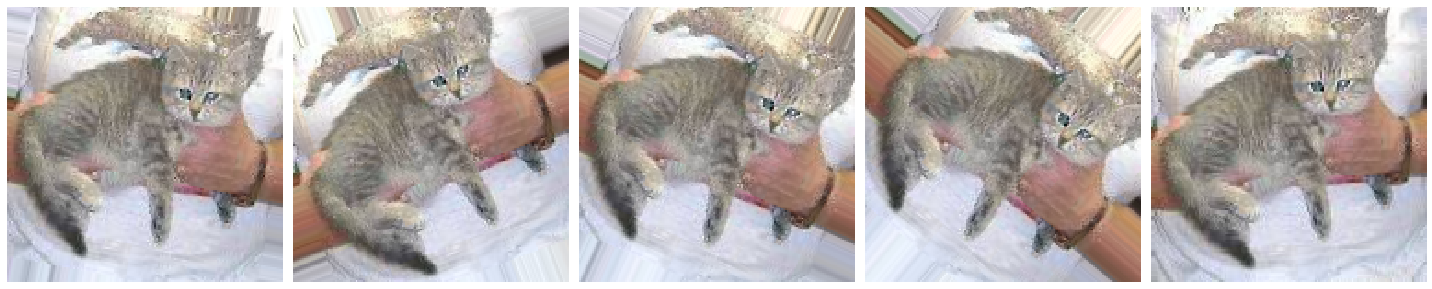

In [29]:
plotImages(augmented_images)

In [30]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


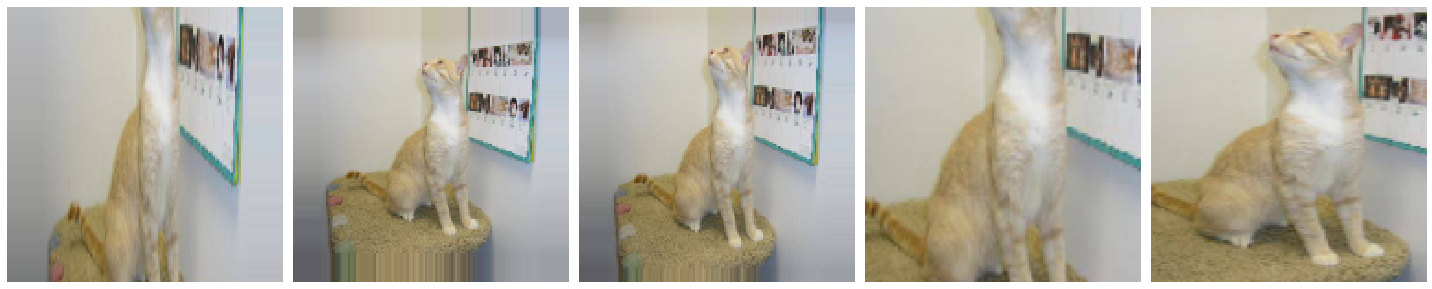

In [32]:
plotImages(augmented_images)

In [33]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [34]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


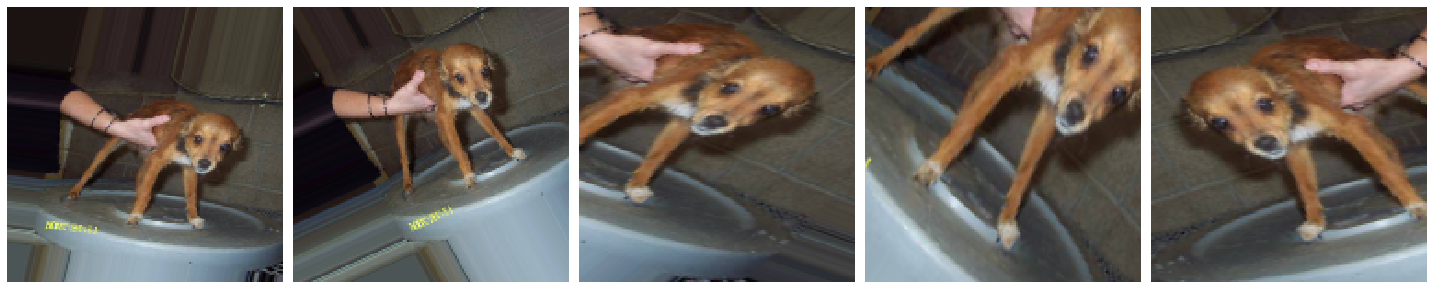

In [35]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [36]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [37]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [38]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(2000, activation='sigmoid'),
    Dense(1500, activation='sigmoid'),
    Dense(1500, activation='sigmoid'),
    
    Dense(1, activation='sigmoid')
])

In [39]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
15/15 [==============================] - 53s 4s/step - loss: 1.3026 - accuracy: 0.4957 - val_loss: 0.7155 - val_accuracy: 0.4933
Epoch 2/100
15/15 [==============================] - 54s 4s/step - loss: 0.7003 - accuracy: 0.4947 - val_loss: 0.7036 - val_accuracy: 0.4933
Epoch 3/100
15/15 [==============================] - 59s 4s/step - loss: 0.6993 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 4/100
15/15 [==============================] - 51s 3s/step - loss: 0.6959 - accuracy: 0.5047 - val_loss: 0.6976 - val_accuracy: 0.5067
Epoch 5/100
15/15 [==============================] - 50s 3s/step - loss: 0.6954 - accuracy: 0.5064 - val_loss: 0.6945 - val_accuracy: 0.5067
Epoch 6/100
15/15 [==============================] - 49s 3s/step - loss: 0.6973 - accuracy: 0.4940 - val_loss: 0.6940 - val_accuracy: 0.5067
Epoch 7/100
15/15 [==============================] - 50s 3s/step - loss: 0.6952 - accuracy: 0.4872 - val_loss: 0.6932 - val_accuracy: 0.5067
Epoch 8/100
1

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
testDir = os.path.join(PATH, 'test')
testImage = validation_image_generator.flow_from_directory( batch_size=1,
                                                           directory=testDir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_image = next(testImage)
plt.imshow(test_image[0][0], interpolation='nearest')
plt.axis('off')
plt.show()
labels = ["Cat", "Dog"]
pred = model_new.predict_proba(test_image)
print(tahn(pred))

value = (pred[0][0])

if(value > .5):
    print("dog")
else:
    print("cat")


NameError: name 'os' is not defined